# Import libs and load data

In [52]:
import pandas as pd

input_file_name = "../dados/base_desafio_cartola.csv"

df = pd.read_csv(input_file_name)

df.head(3)

,user,sexo,uf,idade,dias,pviews,visitas,tempo_total,device,futebol,...,natacao,basquete,handebol,volei,tenis,canoagem,saltos_ornamentais,home,home_olimpiadas,cartola_status
0,1912357,NaN,NaN,NaN,12,31,20,3868.477,pc_e_m,0.000,...,0.0,0.0,0.000,46.851,0.0,0.000,0.000,0.0,606.427,Não Cartola
1,1914630,NaN,NaN,NaN,2,8,5,427.352,pc_only,201.338,...,0.0,0.0,0.000,45.000,0.0,0.000,0.000,0.0,0.000,Não Cartola
2,1915241,NaN,NaN,NaN,14,44,23,14758.755,pc_e_m,4867.997,...,90.0,0.0,2471.093,300.573,0.0,1956.698,431.616,0.0,91.721,Não Cartola


In [53]:
import feature_generation

df_feat = feature_generation.get_new_features(df)

df_feat.head(3)

,user,sexo,uf,idade,dias,pviews,visitas,tempo_total,device,futebol,...,home_perc,home_olimpiadas_perc,tempo_medio_diario,tempo_medio_visita,tempo_medio_pagina,pagina_por_visita,pagina_por_dia,visitas_por_dia,quantidade_modalidades,top_tempo
0,1912357,NaN,NaN,NaN,12,31,20,3868.477,pc_e_m,0.000,...,0.0,0.168632,299.680000,179.8080,116.005161,1.550000,2.583333,1.666667,6,0.730566
1,1914630,NaN,NaN,NaN,2,8,5,427.352,pc_only,201.338,...,0.0,0.000000,168.169000,67.2676,42.042250,1.600000,4.000000,2.500000,4,0.598618
2,1915241,NaN,NaN,NaN,14,44,23,14758.755,pc_e_m,4867.997,...,0.0,0.006392,1024.975286,623.8980,326.128500,1.913043,3.142857,1.642857,10,0.339241


In [54]:
label = "cartola_status"
label_pro = "is_pro"

df = df[df[label].notna()]
df[label_pro] = (df[label] == 'Cartola Pro').astype(int)

## Predictive Power Score (PPS)

In [55]:
import scipy.sparse.linalg
import ppscore as pps

pps_result = pps.predictors(df_feat.drop("cartola_status", axis=1), label_pro)

pps_result.sort_values('model_score', ascending=False).head(10)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
3,idade,is_pro,0,regression,True,mean absolute error,0.0418,0.079692,DecisionTreeRegressor()
1,sexo,is_pro,0,regression,True,mean absolute error,0.0376,0.072287,DecisionTreeRegressor()
2,uf,is_pro,0,regression,True,mean absolute error,0.0346,0.066680,DecisionTreeRegressor()
43,tempo_medio_visita,is_pro,0,regression,True,mean absolute error,0.0226,0.047218,DecisionTreeRegressor()
10,futebol_intenacional,is_pro,0,regression,True,mean absolute error,0.0226,0.046245,DecisionTreeRegressor()
42,tempo_medio_diario,is_pro,0,regression,True,mean absolute error,0.0226,0.045634,DecisionTreeRegressor()
0,user,is_pro,0,regression,True,mean absolute error,0.0226,0.045400,DecisionTreeRegressor()
47,visitas_por_dia,is_pro,0,regression,True,mean absolute error,0.0226,0.045258,DecisionTreeRegressor()
9,futebol,is_pro,0,regression,True,mean absolute error,0.0226,0.045142,DecisionTreeRegressor()
14,ginastica,is_pro,0,regression,True,mean absolute error,0.0226,0.045047,DecisionTreeRegressor()


## T-SNE

In [56]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=300)

sample = df_feat.drop(["cartola_status", "is_pro"], axis=1)
sample = sample.select_dtypes(float)
sample = sample.dropna()

tsne_results = tsne.fit_transform(sample)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 22314 samples in 0.001s...
[t-SNE] Computed neighbors for 22314 samples in 0.776s...
[t-SNE] Computed conditional probabilities for sample 1000 / 22314
[t-SNE] Computed conditional probabilities for sample 2000 / 22314
[t-SNE] Computed conditional probabilities for sample 3000 / 22314
[t-SNE] Computed conditional probabilities for sample 4000 / 22314
[t-SNE] Computed conditional probabilities for sample 5000 / 22314
[t-SNE] Computed conditional probabilities for sample 6000 / 22314
[t-SNE] Computed conditional probabilities for sample 7000 / 22314
[t-SNE] Computed conditional probabilities for sample 8000 / 22314
[t-SNE] Computed conditional probabilities for sample 9000 / 22314
[t-SNE] Computed conditional probabilities for sample 10000 / 22314
[t-SNE] Computed conditional probabilities for sample 11000 / 22314
[t-SNE] Computed conditional probabilities for sample 12000 / 22314
[t-SNE] Computed conditional probabilities for sam

/var/folders/fn/xxcb446104qgcbp2w_8dsr200000gn/T/ipykernel_29430/2051918211.py:7: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.scatterplot(


<Axes: xlabel='tsne-two', ylabel='tsne-one'>

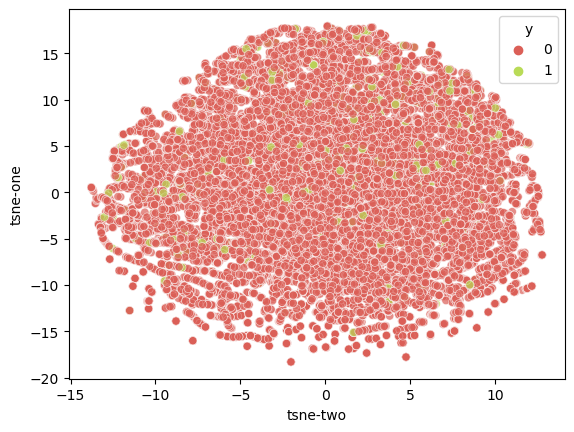

In [57]:
import seaborn as sns 

tsne_df = pd.DataFrame({"tsne-one": tsne_results[:,0],
                        "tsne-two": tsne_results[:,1],
                        "y": df_feat["is_pro"].loc[sample.index]})

sns.scatterplot(
    x="tsne-two",
    y="tsne-one",
    hue="y",
    palette=sns.color_palette("hls", 5),
    data=tsne_df,
    legend="full",
    alpha=0.7,
)